# Probabilidad que un evento caiga en un bin

Comparo la probabilidad exacta con la aproximada

In [1]:
%matplotlib notebook

In [2]:
#pip install boost-histogram

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import boost_histogram as bh

Límites del histograma

In [4]:
xmin, xmax = -5, 5

Número de bines

In [5]:
nbins = 5
# nbins = 11 

In [6]:
bin_width = (xmax-xmin)/nbins
print("Ancho del bin = ", bin_width)

Ancho del bin =  2.0


<IPython.core.display.Javascript object>


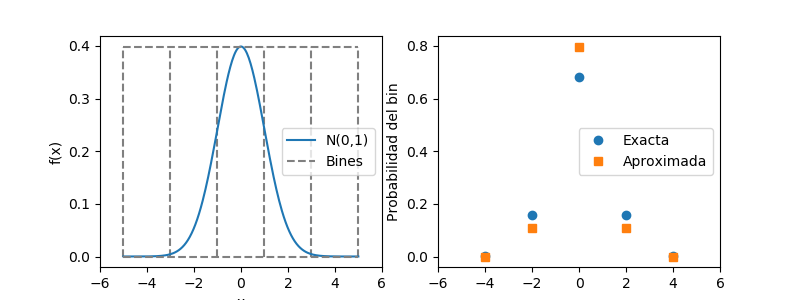

Text(0, 0.5, 'Probabilidad del bin')

In [7]:
fig = plt.figure(figsize=(8,3))
ax1, ax2 = fig.subplots(1,2)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_xlabel('x')
ax2.set_ylabel('Probabilidad del bin')

Límites de los ejes de las figuras

In [8]:
xleft = xmin-0.5*bin_width
xright = xmax+0.5*bin_width
ax1.set_xlim(xleft, xright)
ax2.set_xlim(xleft, xright)

(-6.0, 6.0)

Histograma 

In [9]:
bh.axis.Regular(bins=nbins, start=xmin, stop=xmax)

Regular(5, -5, 5)

In [10]:
hist = bh.Histogram(bh.axis.Regular(bins=nbins, start=xmin, stop=xmax))
xbin = hist.axes.centers[0]
bin_edges = hist.axes.edges[0]
print("Bordes de los bines: ", bin_edges)

Bordes de los bines:  [-5. -3. -1.  1.  3.  5.]


PDF N(0,1) 

In [11]:
x = np.linspace(xmin, xmax, 256)
ax1.plot(x, norm.pdf(x), label='N(0,1)')

In [12]:
ymax = norm.pdf(0)
ax1.plot(bin_edges, np.full_like(bin_edges, 0), color='gray', ls='--', label='Bines')
ax1.plot(bin_edges, np.full_like(bin_edges, ymax), color='gray', ls='--')
ax1.vlines(bin_edges, 0, ymax, color='gray', ls='--',)

Probabilidad exacta

In [13]:
cum_proba = norm.cdf(bin_edges)
pbin1 = cum_proba[1:] - cum_proba[:-1]
ax2.plot(xbin, pbin1, 'o', drawstyle='steps-mid', label='Exacta')

Probabilidad aproximada

In [14]:
pbin2 = norm.pdf(xbin)*bin_width
ax2.plot(xbin, pbin2, 's', drawstyle='steps-mid', label='Aproximada')

In [15]:
ax1.legend()
ax2.legend()

In [16]:
plt.savefig('histo1.svg')